In [1]:
import pickle
import networkx as nx

from collections import Counter

import statistics as st
import matplotlib.pyplot as plt

from datautils import stats


In [2]:
from datautils import datautils

loader = datautils.Loader()
loader.load("data/characters/")
data = loader.to_dataframe()
loader.drop()

In [3]:
data

,Name,DisplayName,Content,Crosslinks,Species,Gender,Affiliation(s),Homeworld,Died
0,%22Blue%22_Imcrix,"""Blue"" Imcrix","""Blue"" Imcrix was an infamous male Taloron cri...","[Star_Wars_Legends, Taloron, Gender/Legends, C...",Taloron,Male,NaN,NaN,NaN
1,%22Fugitive%22_Fod,"""Fugitive"" Fod","""Fugitive"" Fod was a male Yuzzum from Endor wh...","[Star_Wars_Legends, Endor/Legends, Yuzzum/Lege...",Yuzzum,Male,NaN,Endor,NaN
2,%22Shady%22_Pers,"""Shady"" Pers","""Shady"" Pers was a male Human smuggler living ...","[Star_Wars_Legends, Kashyyyk/Legends, Human/Le...",Human,Male,[Myyydril],Kashyyyk,NaN
3,%27Ndranth_Poussan,'Ndranth Poussan,'Ndranth Poussan was a Human male starfighter ...,"[Star_Wars_Legends, Wookieepedia:Good_articles...",Human,Male,"[Agamar Resistance, Alliance to Restore the Re...",Agamar,"[1 BBY, near Brigia]"
4,0761,0761,0761 was a stormtrooper who was stationed on C...,"[Star_Wars_Legends, 5_ABY/Legends, Ciutric_IV,...",Human,Male,"[Galactic EmpireStormtrooper Corps, Stormtroop...",NaN,"[5 ABY, Ciutric IV]"
...,...,...,...,...,...,...,...,...,...
29430,Zzzanmxl,Zzzanmxl,Zzzanmxl was the leader of a band of Zanibar m...,"[Star_Wars_Legends, Xo, Zanibar, Gender/Legend...",Zanibar,Male,NaN,Xo,NaN
29431,Zzzs,Zzzs,Zzzs was a Southern Mustafarian member of Fath...,"[Canon, Wookieepedia:Good_articles, Wookieeped...",Mustafarian,NaN,[Kkkt's clan],NaN,NaN
29432,B%27Crevnis,b'Crevnis,B'Crevnis was a large male Pho Ph'eahian who w...,"[Star_Wars_Legends, Pho_Ph%27eahian, Gender/Le...",Pho Ph'eahian,Male,"[Galactic Republic, Outbound Flight Project, O...",NaN,NaN
29433,Bel-dar-Nolek,bel-dar-Nolek,bel-dar-Nolek was a Human male serving as dire...,"[Star_Wars_Legends, Obroa-skai/Legends, Human/...",Human,Male,"[Galactic Senate, Obroan Institute]",Obroa-skai,NaN


In [4]:
with open('graph/universe.pickle', 'rb') as f:
    Universe = pickle.load(f)

In [5]:
len(Universe.nodes())

29435

In [6]:
outliers = [node for node in Universe.nodes() if Universe.degree(node) == 0]
len(outliers)


6462

In [7]:
outliers_data = data.loc[data['Name'].isin(outliers)]
outliers_data

,Name,DisplayName,Content,Crosslinks,Species,Gender,Affiliation(s),Homeworld,Died
0,%22Blue%22_Imcrix,"""Blue"" Imcrix","""Blue"" Imcrix was an infamous male Taloron cri...","[Star_Wars_Legends, Taloron, Gender/Legends, C...",Taloron,Male,NaN,NaN,NaN
1,%22Fugitive%22_Fod,"""Fugitive"" Fod","""Fugitive"" Fod was a male Yuzzum from Endor wh...","[Star_Wars_Legends, Endor/Legends, Yuzzum/Lege...",Yuzzum,Male,NaN,Endor,NaN
3,%27Ndranth_Poussan,'Ndranth Poussan,'Ndranth Poussan was a Human male starfighter ...,"[Star_Wars_Legends, Wookieepedia:Good_articles...",Human,Male,"[Agamar Resistance, Alliance to Restore the Re...",Agamar,"[1 BBY, near Brigia]"
4,0761,0761,0761 was a stormtrooper who was stationed on C...,"[Star_Wars_Legends, 5_ABY/Legends, Ciutric_IV,...",Human,Male,"[Galactic EmpireStormtrooper Corps, Stormtroop...",NaN,"[5 ABY, Ciutric IV]"
7,1138_(First_Order),1138 (First Order),1138 was a human male stormtrooper who served ...,"[Canon, 1138, Special:Upload, Human, Gender, F...",Human,Male,"[First Order, Stormtrooper Corps, Stormtrooper...",NaN,NaN
...,...,...,...,...,...,...,...,...,...
29421,Zylvarstar,Zylvarstar,Zylvarstar was a Human female who was a Jedi M...,"[Star_Wars_Legends, 3637_BBY, Korriban, Human/...",Human,Female,"[Jedi Order, Galactic Republic]",NaN,"[3637 BBY, Korriban]"
29427,Zytho,Zytho,Zytho was a Human male farmer who lived on Dor...,"[Star_Wars_Legends, Dorlo, 5_ABY/Legends, Huma...",Human,Male,NaN,Dorlo,"[5 ABY, Dorlo]"
29428,Zyyacah_Kolzaar,Zyyacah Kolzaar,Zyyacah Kolzaar was a male Rodian major in the...,"[Star_Wars_Legends, 0_BBY/Legends, Corellia/Le...",Rodian,Male,[Alliance to Restore the Republic],NaN,"[Post-0 BBY, Corellia]"
29432,B%27Crevnis,b'Crevnis,B'Crevnis was a large male Pho Ph'eahian who w...,"[Star_Wars_Legends, Pho_Ph%27eahian, Gender/Le...",Pho Ph'eahian,Male,"[Galactic Republic, Outbound Flight Project, O...",NaN,NaN


In [8]:
for i, l in enumerate(outliers_data["Crosslinks"]):
    print("list", i, "is", type(l))

list 0 is <class 'list'>
list 1 is <class 'list'>
list 2 is <class 'list'>
list 3 is <class 'list'>
list 4 is <class 'list'>
list 5 is <class 'list'>
list 6 is <class 'list'>
list 7 is <class 'list'>
list 8 is <class 'list'>
list 9 is <class 'list'>
list 10 is <class 'list'>
list 11 is <class 'list'>
list 12 is <class 'list'>
list 13 is <class 'list'>
list 14 is <class 'list'>
list 15 is <class 'list'>
list 16 is <class 'list'>
list 17 is <class 'list'>
list 18 is <class 'list'>
list 19 is <class 'list'>
list 20 is <class 'list'>
list 21 is <class 'list'>
list 22 is <class 'list'>
list 23 is <class 'list'>
list 24 is <class 'list'>
list 25 is <class 'list'>
list 26 is <class 'list'>
list 27 is <class 'list'>
list 28 is <class 'list'>
list 29 is <class 'list'>
list 30 is <class 'list'>
list 31 is <class 'list'>
list 32 is <class 'list'>
list 33 is <class 'list'>
list 34 is <class 'list'>
list 35 is <class 'list'>
list 36 is <class 'list'>
list 37 is <class 'list'>
list 38 is <class 'lis

In [9]:
def to_1D(series):
    return pd.Series([x for _list in series for x in _list])

In [10]:
outliers_aff_non_nan = outliers_data["Affiliation(s)"].dropna()
outliers_aff_non_nan

3        [Agamar Resistance, Alliance to Restore the Re...
4        [Galactic EmpireStormtrooper Corps, Stormtroop...
7        [First Order, Stormtrooper Corps, Stormtrooper...
12                                       [Galactic Empire]
28       [Galactic Republic, Grand Army of the Republic...
                               ...                        
29416     [New Republic, Galactic Senate, Galactic Senate]
29421                      [Jedi Order, Galactic Republic]
29428                   [Alliance to Restore the Republic]
29432    [Galactic Republic, Outbound Flight Project, O...
29434                                    [Galactic Empire]
Name: Affiliation(s), Length: 4099, dtype: object

In [11]:
import pandas as pd
to_1D(outliers_data["Crosslinks"]).value_counts()

Star_Wars_Legends              5850
Gender/Legends                 5306
Human/Legends                  2855
Color/Legends                  2334
Wookieepedia:Stub              2176
                               ... 
Hammer_Station                    1
Battle_station                    1
Mechanical_Liberation_Front       1
MerenData/Legends                 1
Challenge_37                      1
Length: 16883, dtype: int64

In [12]:
to_1D(outliers_aff_non_nan).value_counts()

Galactic Republic                    622
Sith Empire                          487
Galactic Empire                      471
Alliance to Restore the Republic     301
Jedi Order                           269
                                    ... 
Edan Spaceways                         1
Corellian Shipbuilders Union           1
Galactic EmpireMoff Lasre Dardano      1
Moff Lasre Dardano                     1
Rebel AllianceArdan resistance         1
Length: 1476, dtype: int64

In [13]:
def outliers_characteristics(column, number_most_common=10):
    counter = Counter(column)
    top_10_out = counter.most_common(number_most_common)
    plt.barh(*zip(*top_10_out[::-1]))
    plt.title(f' Distribution of {column.name}')


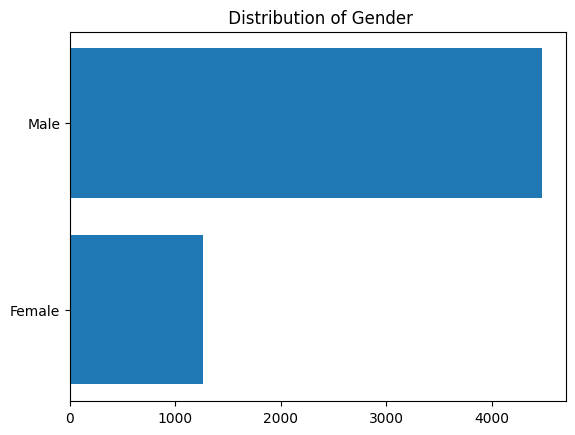

In [14]:
outliers_characteristics(outliers_data["Gender"], 2)

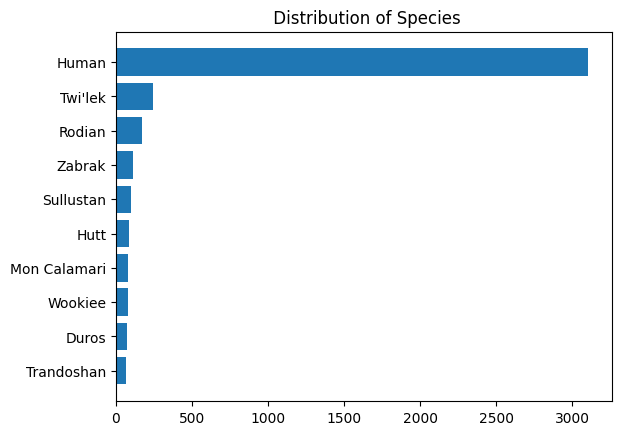

In [15]:
outliers_characteristics(outliers_data["Species"])

In [16]:
outliers_data["Homeworld"] = outliers_data["Homeworld"].astype(str)

/var/folders/v6/tts1n1754c19kygxl7bbf6j40000gn/T/ipykernel_3266/2238873581.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers_data["Homeworld"] = outliers_data["Homeworld"].astype(str)


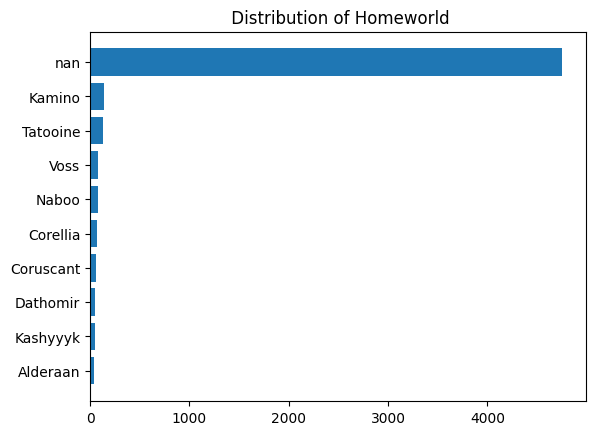

In [17]:
outliers_characteristics(outliers_data["Homeworld"])